In [ ]:
import numpy as np
from numpy.dtypes import StringDType
import random
from random import randint
import matplotlib.pyplot as plt
from zootopia3 import *

In [2]:
save_folder = '../data'

img_width = 224
img_height = 224
min_x = 10
max_x = 40
num_shape_examples = 20
num_noise_examples = 100

colors_dict = {
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "purple": (255, 0, 255),
    "cyan": (0, 255, 255),
}

shape_names = [
    'circle',
    'triangle',
    'rectangle',
    'diamond'
]

shades = True
magnitude = 50

In [3]:
if shades:
    num_examples_each = num_shape_examples * 8
else:
    num_examples_each = num_shape_examples * 6

target_color = np.empty(
    num_examples_each * 4 + num_noise_examples,
    dtype = StringDType
)
target_shape = np.empty(
    num_examples_each * 4 + num_noise_examples,
    dtype = StringDType
)
images = np.zeros(
    (num_examples_each * 4 + num_noise_examples,
        img_height,
        img_width,
        3
    ),
    dtype = np.uint8
)

In [4]:

# simulate training, validation, and testing data
itr = 0
for shape_name in shape_names:
    simulated_data = simulate_shapes(
        num_shape_examples,
        shape_name,
        img_height,
        img_width,
        min_x,
        max_x,
        colors_dict,
        magnitude,
        magnitude,
        shades
    )
    images[itr:itr+num_examples_each,] = simulated_data[-1]
    target_shape[itr:itr+num_examples_each] = simulated_data[1]
    target_color[itr:itr+num_examples_each] = simulated_data[0]
    itr += num_examples_each

images_noise = [
    np.random.randint(0, 256, (img_height, img_width, 3), dtype=np.uint8)
    for _ in range(num_noise_examples)
]
images_noise = np.array(images_noise)
images[itr:,] = images_noise
target_color[itr:] = 'noise'
target_shape[itr:] = 'noise'

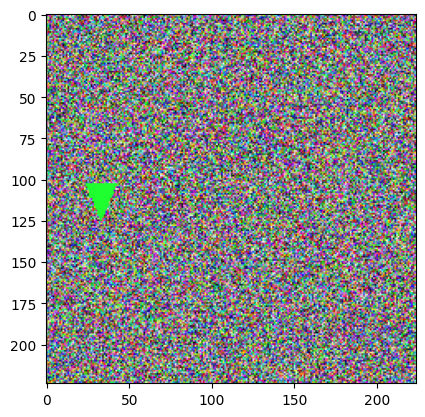

In [14]:
idx = random.randint(0,800)
plt.imshow(images[idx])

In [ ]:
# save the data
np.save(f'{save_folder}/images.npy', images)
np.savetxt(f'{save_folder}/target_color.txt', target_color, fmt='%s')
np.savetxt(f'{save_folder}/target_shape.txt', target_shape, fmt='%s')